

---

# **Data Preparation**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload

In [8]:
df = pd.read_csv('/content/drive/MyDrive/churn.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df.drop(columns = ['RowNumber','Surname', 'CustomerId'], inplace=True)


In [13]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df['Balance'] = df['Balance'].astype(int)

In [14]:
le = LabelEncoder()
lstforle = ['Geography', 'Gender']
for i in lstforle :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',
          le.inverse_transform(df[i].unique()))

Geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']
Gender  :  [0 1]  =  ['Female' 'Male']


In [15]:
df.shape

(10000, 11)

# **EDA**


Identifying relationships and correlations among variables.

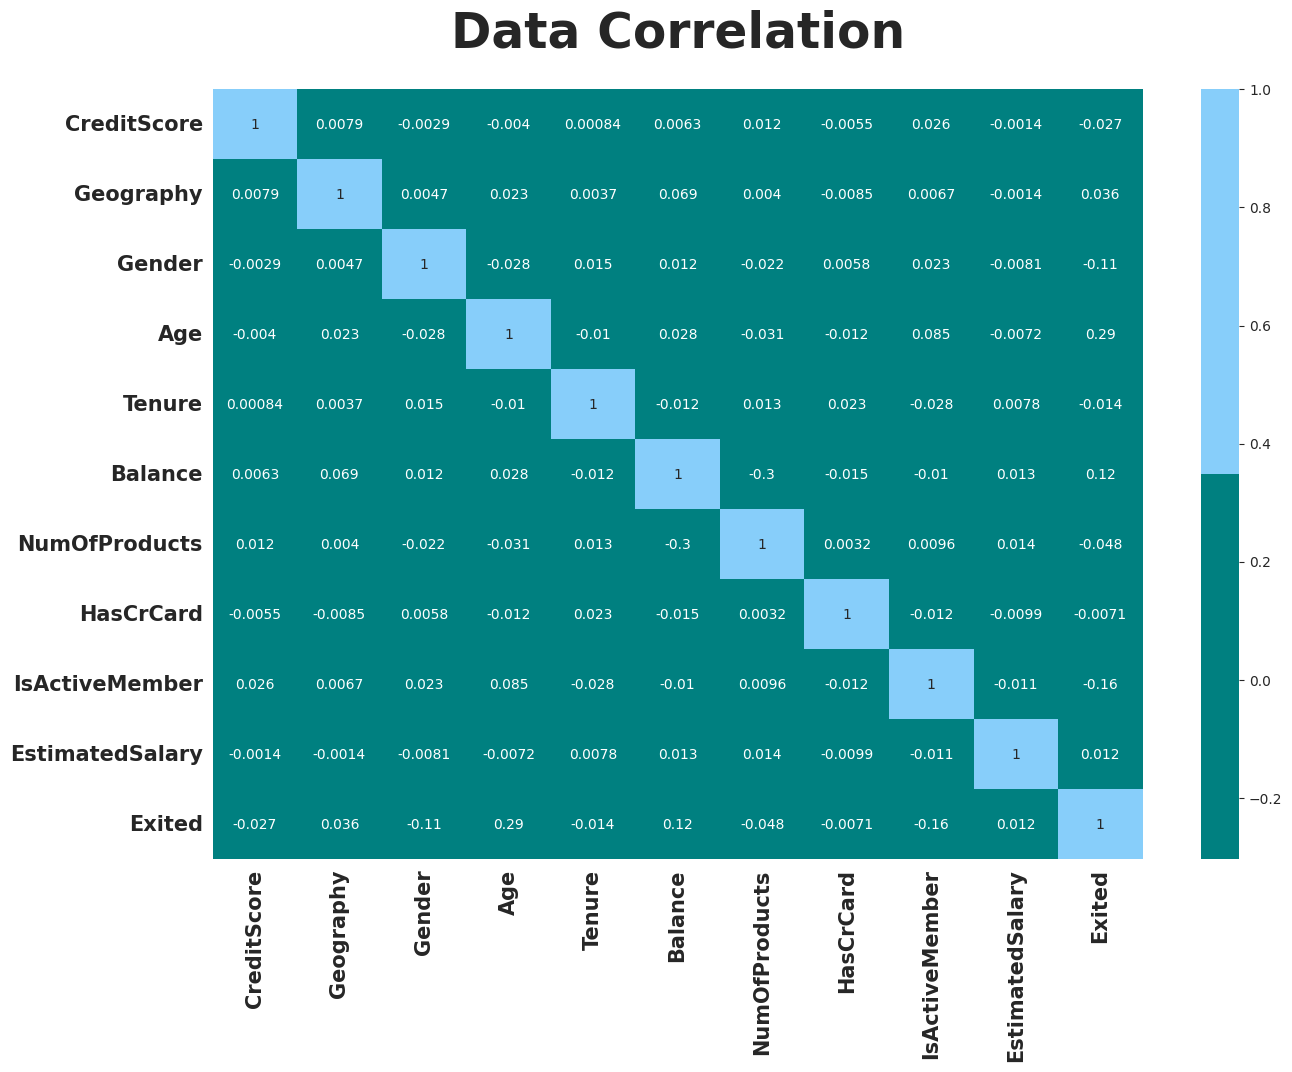

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            cmap = ['#008080','#87CEFA'], annot=True)
plt.title("Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);

In [17]:
data_numeric = df.describe(include=[np.number])
data_numeric

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000


*   The positive correlation between Credit Score and IsActiveMember suggests that customers with higher credit scores are more likely to be active members.
*   The notable relationship between Balance and NumOfProducts indicates that there is a strong association between the balance in an account and the number of products held by a customer.
*   The lowest correlation between Tenure and HasCrCard implies that there is little to no relationship between a customer's length of tenure and whether they have a credit card with the bank.

Text(0.5, 1.0, 'Target Variable Distribution (Exited)')

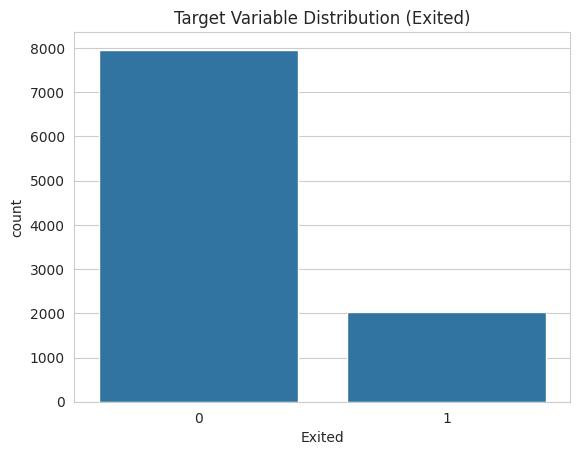

In [19]:
sns.countplot(x='Exited', data=df)
plt.title('Target Variable Distribution (Exited)')

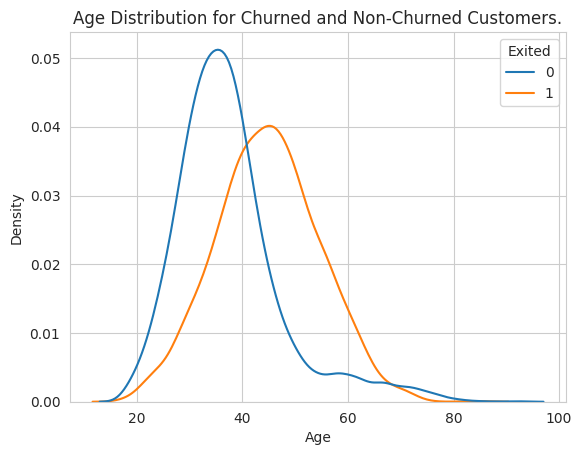

In [20]:
sns.kdeplot(data=df, x='Age', hue='Exited', common_norm=False)
plt.title('Age Distribution for Churned and Non-Churned Customers.')
plt.show()

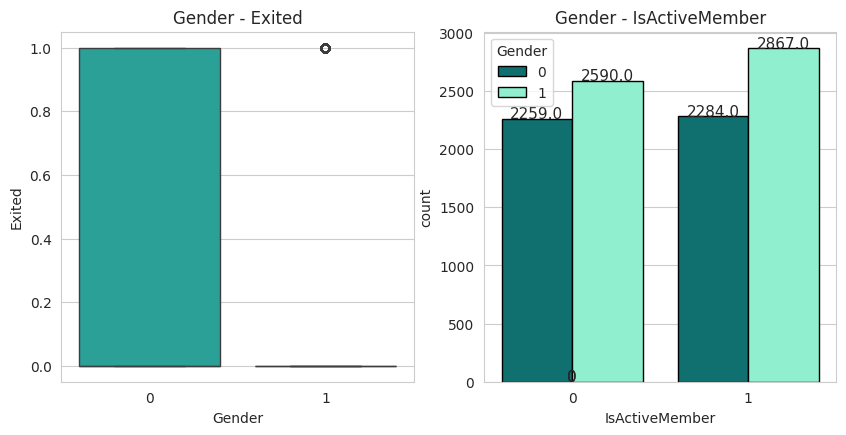

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(2, 2, 1)
sns.boxplot(data = df,
                x = 'Gender',
                y='Exited',
                color = '#17b3a8'
                )
plt.title('Gender - Exited')

plt.subplot(2, 2, 2)
ax = sns.countplot(x = 'IsActiveMember',data = df,hue = "Gender",palette = [ '#008080', '#7FFFD4'],edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),\
            horizontalalignment='center', fontsize = 11)
plt.title('Gender - IsActiveMember');

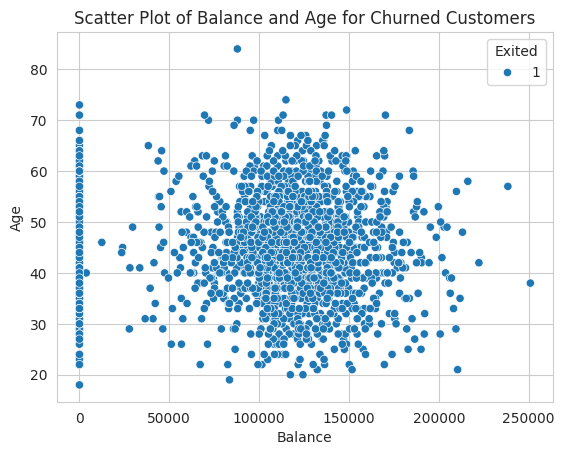

In [22]:
sns.scatterplot(x='Balance', y='Age', hue='Exited', data=df[df['Exited'] == 1])
plt.title('Scatter Plot of Balance and Age for Churned Customers')
plt.show()

Text(0.5, 1.0, 'IsActiveMember - Age')

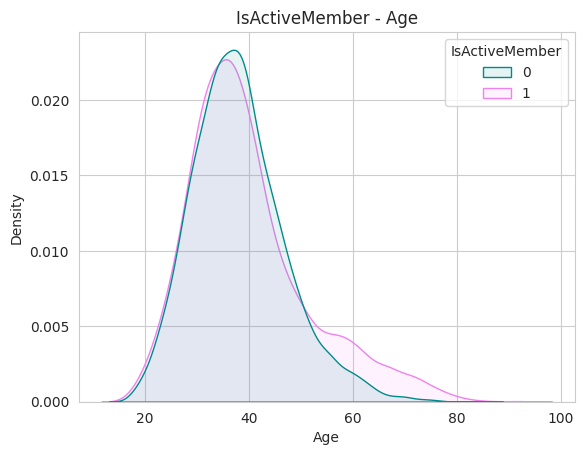

In [23]:
sns.kdeplot(data = df,
                x = 'Age',
                fill = True,
                alpha = 0.1,
                hue = 'IsActiveMember',
                palette = [ '#008B8B', '#EE82EE',]
                )
plt.title('IsActiveMember - Age')

In [24]:
from scipy.stats import ttest_ind

churn_group = df[df['Exited'] == 1]['Balance']
not_churn_group = df[df['Exited'] == 0]['Balance']

t_stat, p_value = ttest_ind(churn_group, not_churn_group)
print(f'T-Statistic: {t_stat}, p-value: {p_value}')

T-Statistic: 11.936238174316943, p-value: 1.275595450369167e-32


In [25]:
mean_age_churn = df[df['Exited'] == 1]['Age'].mean()
mean_age_not_churn = df[df['Exited'] == 0]['Age'].mean()

print(f'The average age of churned customers.: {mean_age_churn}')
print(f'The average age of not churned customers.: {mean_age_not_churn}')

The average age of churned customers.: 44.8379970544919
The average age of not churned customers.: 37.40838879819164


The factors of age and gender significantly influence customers' decisions to exit from the bank's services. Specifically, older customers and female customers tend to have a propensity to churn.

In [26]:
features = df[['CreditScore', 'Age','Tenure',
                'Balance',
                'NumOfProducts', 'EstimatedSalary', 'Geography',
                'Gender','HasCrCard', 'IsActiveMember']]
target = df['Exited']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler().fit(x_train)
scaler_x = scaler.transform(x_train)

model = RandomForestClassifier(n_estimators=40, random_state=42)
model.fit(scaler_x, y_train)

scaledx_test = scaler.transform(x_test)
y_pred = model.predict(scaledx_test)

In [29]:
accuracy_mean = accuracy_score(y_test, y_pred)
accuracy_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_mean)
print("Confusion Matrix:\n", accuracy_matrix)

y_pred_new_data = model.predict(scaler.transform(features))
print("Accuracy on new data:", accuracy_score(target, y_pred_new_data))

Accuracy: 0.8605
Confusion Matrix:
 [[1541   66]
 [ 213  180]]
Accuracy on new data: 0.9712


**And the final accuracy result has been obtained at 97.12%.**

# **Conclusion**

1.   Customers with lower credit scores are more likely to churn.
2.   The average age of churned customers is higher compared to non-churned customers.
3.   Older customers have a higher tendency to churn.
4.   Female customers exhibit a higher churn rate compared to male customers.

# **Recommendation**

*   Focus retention efforts on customers with lower credit scores: Pay special attention to customers with low credit scores by developing targeted retention strategies to retain them.
*   Develop retention programs for older customers: Since older customers have a higher tendency to churn, the company can develop retention programs specifically designed to meet their needs and preferences.
*   Customize services for female customers: Since female customers tend to have a higher churn rate, the company can tailor services or product offerings to better align with the preferences and needs of female customers.
*   Enhance retention efforts through personalized marketing: Utilize demographic and behavioral data of customers to develop more personalized and relevant marketing campaigns designed to increase customer engagement and loyalty.
*   Address age-based customer needs: Additionally, the company can review the products and services offered to ensure they meet the needs and expectations of customers of different ages.